<a href="https://colab.research.google.com/github/gayatriverm/Genetic-Algorithm-Project/blob/main/Vehicle_Routing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.8 MB/s eta 0:00:00


In [2]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
#Define the number of locations and vehicles
num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [5]:
#Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [7]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [8]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

gen	nevals	avg   	min   
0  	300   	586.23	1.3742
1  	213   	562.883	4.30812
2  	243   	559.718	1.03873
3  	232   	551.426	1.03873
4  	233   	539.454	3.06131
5  	218   	532.708	5.02769
6  	213   	530.35 	6.53782
7  	233   	525.874	4.83331
8  	219   	518.172	4.03314
9  	209   	509.232	3.7989 
10 	224   	509.682	1.33684
11 	230   	509.389	1.33684
12 	230   	509.972	1.22947
13 	217   	503.186	2.00239
14 	231   	503.286	0.804436
15 	250   	504.258	3.86704 
16 	238   	502.932	1.68535 
17 	236   	492.24 	4.42658 
18 	225   	489.388	4.22832 
19 	225   	485.387	5.34938 
20 	209   	475.969	4.212   
21 	232   	471.828	5.28716 
22 	237   	469.998	2.24864 
23 	217   	463.103	0.605368
24 	227   	461.913	1.74704 
25 	246   	456.143	4.98825 
26 	233   	435.601	4.09229 
27 	219   	422.479	1.391   
28 	229   	409.629	1.391   
29 	223   	403.435	3.05772 
30 	238   	389.384	2.67447 
31 	225   	373.398	2.67447 
32 	221   	369.2  	2.21541 
33 	243   	365.131	2.5202  
34 	232   	353.676	1.11426 
35 	244   	

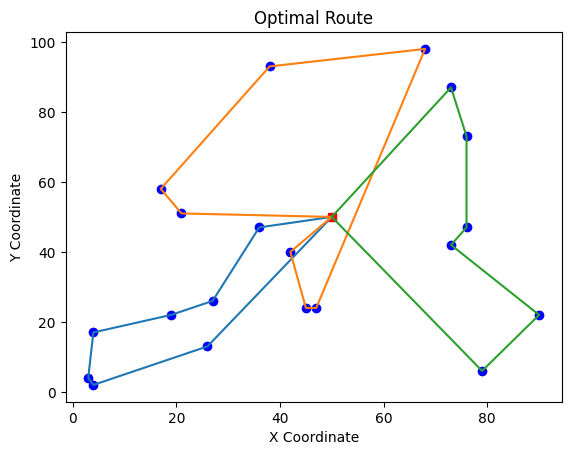

In [9]:
if __name__ == "__main__":
    main()